# **Preparation**
Within preparation we'll install PyDrive, to connect our drive with Google Colaboratory. Then we mount our drive in Google Colaboratory, so we can access our file from drive in Google Colaboratory. After that we should create directory, where our file or data was saved. After finished it, we can import the libraries we need like numpy, pandas, matplotlib, etc.

In [ ]:
#Install Python Drive
!pip install -U -q PyDrive

In [ ]:
#Mount drive with Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Create directory in FGA_Data_Science
%cd /content/drive/My Drive/FGA_Data_Science

/content/drive/My Drive/FGA_Data_Science


In [ ]:
#import numpy and pandas
import numpy as np
import pandas as pd

In [ ]:
#import matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**
Here we'll load our data and save it as dataframe. We'll try to get some insight from nutrition facts in McDonal's menu. The last data was updated 4 years ago. We get the data from https://www.kaggle.com/mcdonalds/nutrition-facts.

In [ ]:
mcd_df = pd.read_csv('menu_mcd.csv')
mcd_df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


# **Data Pre-Processing**
We will pre-process the data to check if there are some errors in our data such as missing values, errors formatting, etc.

In [ ]:
mcd_df.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [ ]:
mcd_df.describe(include='all')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Caramel Latte (Small),16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


In [ ]:
mcd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [ ]:
mcd_df.isnull().values.any()

False

**There is no missing values in our dataset.**

<hr>

Let's see unique value of 'Category' column.

In [ ]:
mcd_df.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

Let's check all of column name

In [ ]:
mcd_df.columns.values

array(['Category', 'Item', 'Serving Size', 'Calories',
       'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)',
       'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat',
       'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium',
       'Sodium (% Daily Value)', 'Carbohydrates',
       'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'], dtype=object)

To make data processing easier, we will change the column names

In [ ]:
headers = ['Category', 
          'Item', 
          'Serving-Size', 
          'Calories', 
          'Calories-from-Fat', 
          'Total-Fat', 
          'Total-Fat-Daily', 
          'Saturated-Fat', 
          'Saturated-Fat-Daily', 
          'Trans-Fat', 
          'Cholesterol', 
          'Cholesterol-Daily', 
          'Sodium',
          'Sodium-Daily', 
          'Carbohydrates', 
          'Carbohydrates-Daily', 
          'Dietary-Fiber', 
          'Dietary-Fiber-Daily', 
          'Sugars', 
          'Protein', 
          'Vit-A-Daily', 
          'Vit-C-Daily', 
          'Calcium-Daily', 
          'Iron-Daily']

# Replace default header
mcd_df.columns = headers

mcd_df.head(5)

,Category,Item,Serving-Size,Calories,Calories-from-Fat,Total-Fat,Total-Fat-Daily,Saturated-Fat,Saturated-Fat-Daily,Trans-Fat,Cholesterol,Cholesterol-Daily,Sodium,Sodium-Daily,Carbohydrates,Carbohydrates-Daily,Dietary-Fiber,Dietary-Fiber-Daily,Sugars,Protein,Vit-A-Daily,Vit-C-Daily,Calcium-Daily,Iron-Daily
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


Replace index column with 'Category' column to make indexing easier

In [ ]:
mcd_df.set_index('Category', inplace=True)

In [ ]:
mcd_df.head()

,Item,Serving-Size,Calories,Calories-from-Fat,Total-Fat,Total-Fat-Daily,Saturated-Fat,Saturated-Fat-Daily,Trans-Fat,Cholesterol,Cholesterol-Daily,Sodium,Sodium-Daily,Carbohydrates,Carbohydrates-Daily,Dietary-Fiber,Dietary-Fiber-Daily,Sugars,Protein,Vit-A-Daily,Vit-C-Daily,Calcium-Daily,Iron-Daily
Category,,,,,,,,,,,,,,,,,,,,,,,
Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


Okay, now we can start to answer these questions:

# **a. How many calories does the average McDonald's value meal contain?**

In [ ]:
# Create category list
cat_mcd = list(mcd_df.index.unique())

# Create new dataframe to save the category calories
category_calories = pd.DataFrame()
category_calories['Category'] = cat_mcd
category_calories.set_index('Category', inplace=True)
category_calories

""
Category
Breakfast
Beef & Pork
Chicken & Fish
Salads
Snacks & Sides
Desserts
Beverages
Coffee & Tea
Smoothies & Shakes


In [ ]:
calories = []
calories_fat = []
total_calories = []
total_calories_fat = []
avg_total = []

i = 0
for items in cat_mcd:
    cal_total = mcd_df[mcd_df.index==items]['Calories'].sum()
    total_calories.append(cal_total)

    cal_fat_total = mcd_df[mcd_df.index==items]['Calories-from-Fat'].sum()
    total_calories_fat.append(cal_fat_total)

    cal_mean = mcd_df[mcd_df.index==items]['Calories'].mean()
    calories.append(round(cal_mean, 2))

    cal_fat_mean = mcd_df[mcd_df.index==items]['Calories-from-Fat'].mean()
    calories_fat.append(round(cal_fat_mean, 2))

    avg_cal_total = (mcd_df[mcd_df.index==items]['Calories']+mcd_df[mcd_df.index==items]['Calories-from-Fat']).mean()
    avg_total.append(round(avg_cal_total, 2))

    i = i+1
category_calories['Calories'] = total_calories
category_calories['Calories from Fat'] = total_calories_fat
category_calories['Average Calories'] = calories
category_calories['Average Calories from Fat'] = calories_fat
category_calories['Average Total'] = avg_total
category_calories

,Calories,Calories from Fat,Average Calories,Average Calories from Fat,Average Total
Category,,,,,
Breakfast,22120,10455,526.67,248.93,775.60
Beef & Pork,7410,3370,494.00,224.67,718.67
Chicken & Fish,14930,6540,552.96,242.22,795.19
Salads,1620,650,270.00,108.33,378.33
Snacks & Sides,3195,1230,245.77,94.62,340.38
Desserts,1555,450,222.14,64.29,286.43
Beverages,3070,20,113.70,0.74,114.44
Coffee & Tea,26970,6755,283.89,71.11,355.00
Smoothies & Shakes,14880,3575,531.43,127.68,659.11


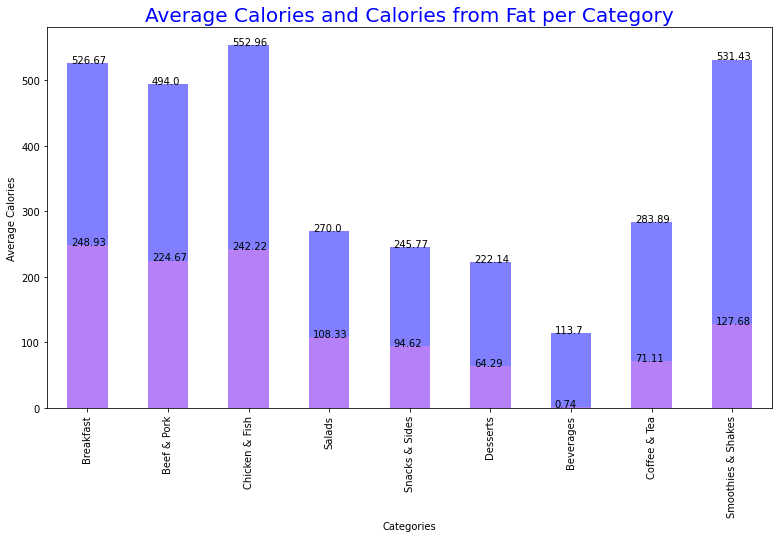

In [ ]:
#plot
index = ['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads', 'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea', 'Smoothies & Shakes']

category_calories['Average Calories'].iloc[:].plot(kind='bar', figsize=(13,7), alpha=0.5, stacked=True, color='blue')
category_calories['Average Calories from Fat'].iloc[:].plot(kind='bar', figsize=(13,7), alpha=0.5, stacked=True, color='violet')

plt.xlabel('Categories') # add to x-label to the plot
plt.ylabel('Average Calories') # add y-label to the plot
plt.title('Average Calories and Calories from Fat per Category', fontdict={'fontsize':20, 'color': 'blue'}) # add title to the plot

for index, value in enumerate(category_calories['Average Calories'].iloc[:]):
    label = str(round(value,2))
    
    plt.annotate(label, xy=(index - 0.2, value-0.01), color='black')

for index, value in enumerate(category_calories['Average Calories from Fat'].iloc[:]):
    label = str(round(value,2))
    
    plt.annotate(label, xy=(index - 0.2, value-0.01), color='black')

plt.show()

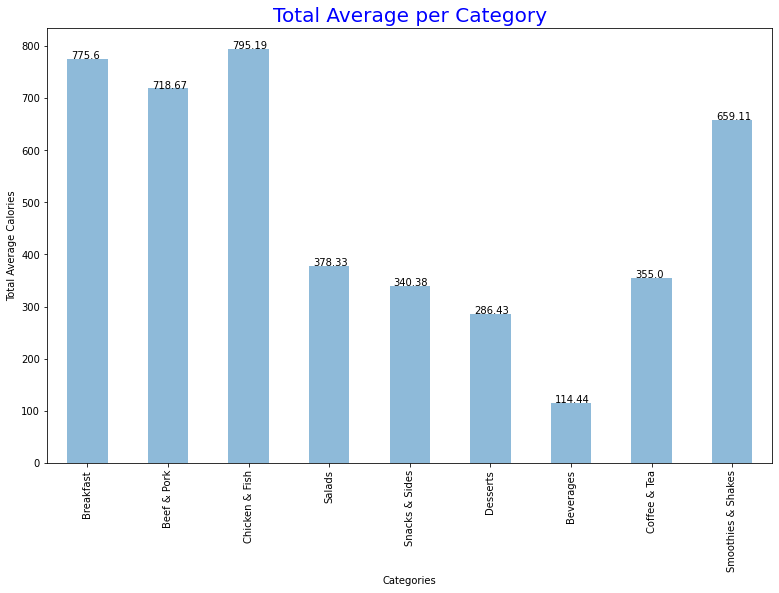

In [ ]:
category_calories['Average Total'].iloc[:].plot(kind='bar', figsize=(13,8), alpha=0.5)

plt.xlabel('Categories') # add to x-label to the plot
plt.ylabel('Total Average Calories') # add y-label to the plot
plt.title('Total Average per Category', fontdict={'fontsize':20, 'color': 'blue'}) # add title to the plot

for index, value in enumerate(category_calories['Average Total'].iloc[:]):
    label = str(round(value,2))
    
    plt.annotate(label, xy=(index - 0.2, value - 0.01), color='black')

plt.show()

In [ ]:
#Since the foods without beverages menu is placed in the first 6 categories, we will create a new list
meals_only = category_calories.head(6)
#Average calories for all categories
print("Average calories of all McD's meals (include beverages): ", round(category_calories['Average Calories'].mean(), 2), "Calories")
#Average calories for foods categories without beverages
print("Average calories of all McD's meals (exclude beverages): ", round(meals_only['Average Calories'].mean(), 2), "Calories")
#Total average calories and calories from fat for all categories
print("Average calories and calories from fat of all McD's meals (include beverages): ",
      round((category_calories['Average Calories'] + category_calories['Average Calories from Fat']).mean(), 2), "Calories")
#Total average calories and calories from fat for foods without beverages
print("Average calories and calories from fat of all McD's meals (exclude beverages): ",
      round((meals_only['Average Calories'] + meals_only['Average Calories from Fat']).mean(), 2), "Calories")

Average calories of all McD's meals (include beverages):  360.06 Calories
Average calories of all McD's meals (exclude beverages):  385.26 Calories
Average calories and calories from fat of all McD's meals (include beverages):  491.46 Calories
Average calories and calories from fat of all McD's meals (exclude beverages):  549.1 Calories


##**Answer**

*   Average calories of all McD's meals (**include beverages**):  **368.27** Calories
*   Average calories of all McD's meals (**exclude beverages**):  **462.09** Calories
*   Average calories and calories from fat of all McD's meals (**include beverages**):  **491.46** Calories
*   Average calories and calories from fat of all McD's meals (**exclude beverages**):  **549.1** Calories 


# **b. How much do beverages, like soda or coffee, contribute to the overall caloric intake?**

In [ ]:
# Create category calories data
category_calories_df = mcd_df.iloc[:,0:4].groupby('Category').sum()
category_calories_df['Total-Calories'] = category_calories_df['Calories']+category_calories_df['Calories-from-Fat']
category_calories_df['Contribute-Calories(%)'] = (category_calories_df['Total-Calories']/category_calories_df['Total-Calories'].sum())*100

# Sort data by 'Total-Calories' ascending
category_calories_df.sort_values(by='Total-Calories', ascending=True, inplace=True)

category_calories_df

,Calories,Calories-from-Fat,Total-Calories,Contribute-Calories(%)
Category,,,,
Desserts,1555,450,2005,1.556737
Salads,1620,650,2270,1.762491
Beverages,3070,20,3090,2.399161
Snacks & Sides,3195,1230,4425,3.435692
Beef & Pork,7410,3370,10780,8.369890
Smoothies & Shakes,14880,3575,18455,14.328972
Chicken & Fish,14930,6540,21470,16.669902
Breakfast,22120,10455,32575,25.292131
Coffee & Tea,26970,6755,33725,26.185023


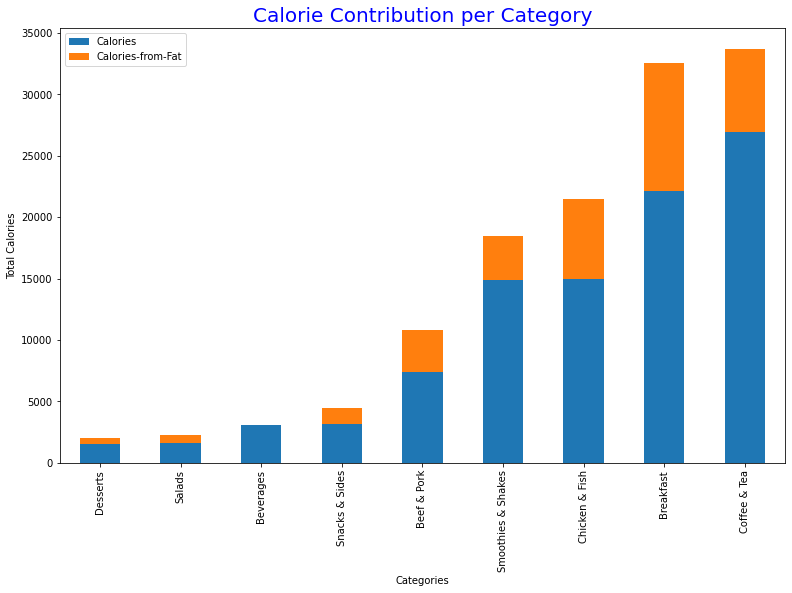

In [ ]:
# Plot the contribution of calories and calories from fat per category
category_calories_df.iloc[:,:2].plot(kind='bar', figsize=(13,8), stacked=True)

plt.xlabel('Categories') # add to x-label to the plot
plt.ylabel('Total Calories') # add y-label to the plot
plt.title('Calorie Contribution per Category', fontdict={'fontsize':20, 'color': 'blue'}) # add title to the plot

plt.show()

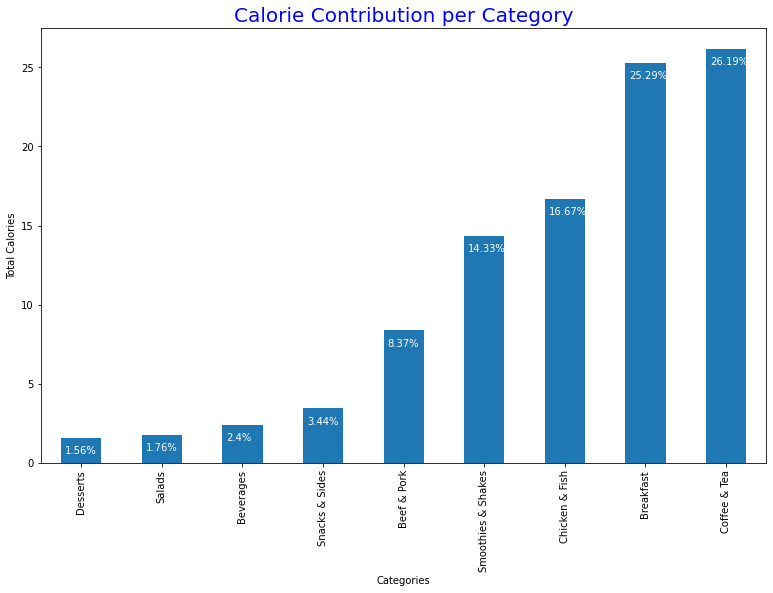

In [ ]:
# Plot the percentage contribution of calories per category with bar chart
category_calories_df['Contribute-Calories(%)'].iloc[:].plot(kind='bar', figsize=(13,8))

plt.xlabel('Categories') # add to x-label to the plot
plt.ylabel('Total Calories') # add y-label to the plot
plt.title('Calorie Contribution per Category', fontdict={'fontsize':20, 'color': 'blue'}) # add title to the plot

for index, value in enumerate(category_calories_df['Contribute-Calories(%)'].iloc[:]):
    label = str(round(value,2))+'%'
    
    plt.annotate(label, xy=(index - 0.2, value - 1), color='white')

plt.show()

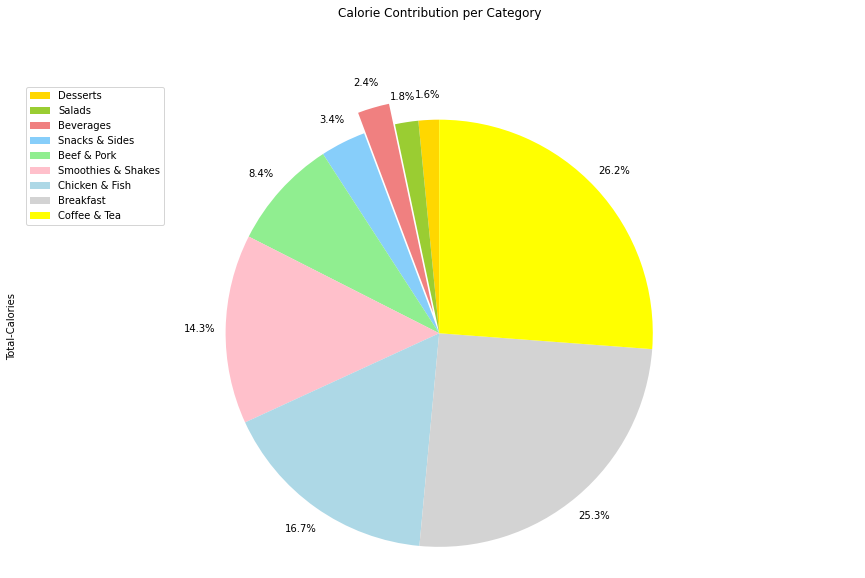

In [ ]:
# Plot the percentage contribution of calories per category with pie chart
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'lightblue', 'lightgrey', 'yellow']
explode_list = [0, 0, 0.1, 0, 0, 0, 0, 0, 0] # ratio for each continent with which to offset each wedge.
category_calories_df['Total-Calories'].plot(kind='pie',
                            figsize=(15, 9),
                            autopct='%1.1f%%', 
                            startangle=90,      
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            colors=colors_list,
                            explode=explode_list         # 'explode' beverages value
                            )

# scale the title up by 12% to match pctdistance
plt.title('Calorie Contribution per Category', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=category_calories_df.index, loc='upper left') 

plt.show()

In [ ]:
# Create category calories data
beverages_df = mcd_df[mcd_df.index == 'Beverages'].iloc[:,:4]
beverages_df['Total-Calories'] = beverages_df['Calories']+beverages_df['Calories-from-Fat']
beverages_df['Contribute-Calories(%)'] = (beverages_df['Total-Calories']/beverages_df['Total-Calories'].sum())*100

# Set index
beverages_df.set_index('Item', inplace=True)

# Sort data by 'Total-Calories' ascending
beverages_df.sort_values(by='Total-Calories', ascending=True, inplace=True)

beverages_df

,Serving-Size,Calories,Calories-from-Fat,Total-Calories,Contribute-Calories(%)
Item,,,,,
Diet Dr Pepper (Medium),21 fl oz cup,0,0,0,0.000000
Diet Dr Pepper (Child),12 fl oz cup,0,0,0,0.000000
Diet Dr Pepper (Large),30 fl oz cup,0,0,0,0.000000
Diet Dr Pepper (Small),16 fl oz cup,0,0,0,0.000000
Diet Coke (Child),12 fl oz cup,0,0,0,0.000000
Diet Coke (Large),30 fl oz cup,0,0,0,0.000000
Dasani Water Bottle,16.9 fl oz,0,0,0,0.000000
Diet Coke (Small),16 fl oz cup,0,0,0,0.000000
Diet Coke (Medium),21 fl oz cup,0,0,0,0.000000


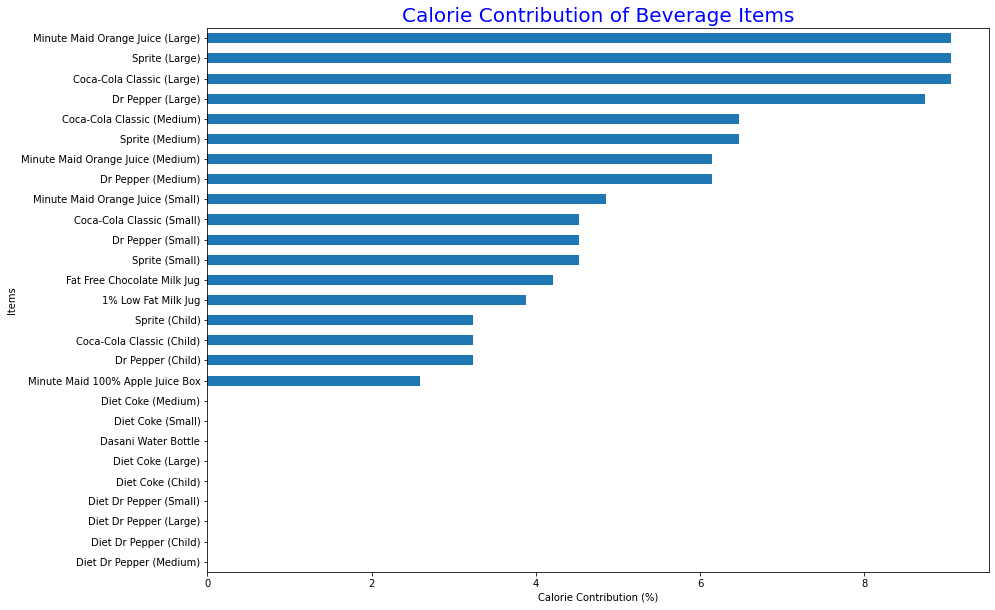

In [ ]:
# Plot the percentage value of the contribution of each item in the beverages category
beverages_df['Contribute-Calories(%)'].iloc[:].plot(kind='barh', figsize=(14,10), legend=False)

plt.xlabel('Calorie Contribution (%)') # add to x-label to the plot
plt.ylabel('Items') # add y-label to the plot
plt.title('Calorie Contribution of Beverage Items', fontdict={'fontsize':20, 'color': 'blue'}) # add title to the plot

plt.show()

## **Answer**
As we can see from the previous table and diagram that the calories in the 'beverages' category contribute as much as **2.4%** or as much as **3090** calories from the total calories on the menu, and the 'Beverages' category is in **the 3rd position in the lowest** calorie contributor to the overall menu.

# **c. Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?**

In [ ]:
sandwich_data = mcd_df[mcd_df['Item'].str.contains('Sandwich')]
sandwich_data = sandwich_data.iloc[:,[0,5,7,10,12,14,16,19,20,21,22]]
sandwich_data['Total Daily Value'] = sandwich_data.sum(axis=1)
sandwich_data['Chicken Type'] = sandwich_data['Item'].str.extract("(Crispy|Grilled)")
sandwich_data['Item Type'] = sandwich_data['Item'].str.extract("(Classic|Club|Ranch|Bacon|Southern)")
sandwich_data

,Item,Total-Fat-Daily,Saturated-Fat-Daily,Cholesterol-Daily,Sodium-Daily,Carbohydrates-Daily,Dietary-Fiber-Daily,Vit-A-Daily,Vit-C-Daily,Calcium-Daily,Iron-Daily,Total Daily Value,Chicken Type,Item Type
Category,,,,,,,,,,,,,,
Chicken & Fish,Premium Crispy Chicken Classic Sandwich,33,18,16,41,18,13,4,6,15,20,184,Crispy,Classic
Chicken & Fish,Premium Grilled Chicken Classic Sandwich,13,9,22,34,14,13,4,8,15,20,152,Grilled,Classic
Chicken & Fish,Premium Crispy Chicken Club Sandwich,51,44,29,59,19,14,8,20,30,20,294,Crispy,Club
Chicken & Fish,Premium Grilled Chicken Club Sandwich,31,36,35,52,15,13,8,20,30,20,260,Grilled,Club
Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,43,31,24,58,19,13,4,20,15,20,247,Crispy,Ranch
Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,23,22,30,51,14,13,4,20,15,20,212,Grilled,Ranch
Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,59,51,31,72,22,15,8,25,30,15,328,Crispy,Bacon
Chicken & Fish,Bacon Clubhouse Grilled Chicken Sandwich,39,42,37,65,17,15,8,30,30,15,298,Grilled,Bacon
Chicken & Fish,Southern Style Crispy Chicken Sandwich,29,15,14,38,14,7,4,2,15,15,153,Crispy,Southern


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


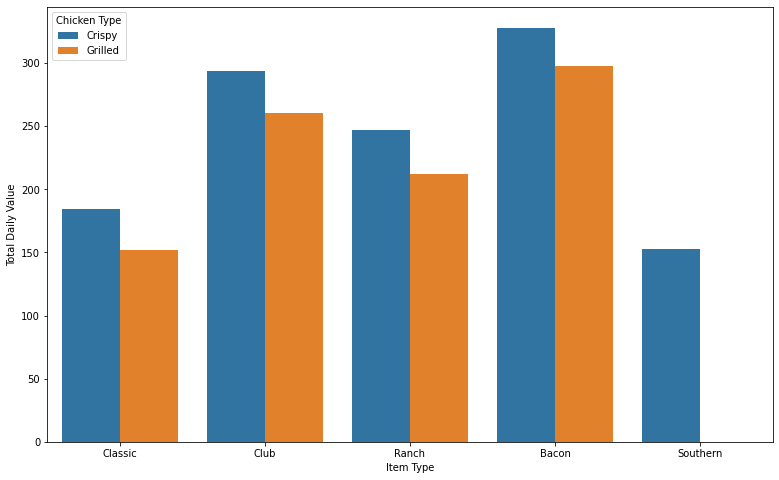

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(sandwich_data['Item Type'], sandwich_data['Total Daily Value'], hue=sandwich_data['Chicken Type'])
plt.show()

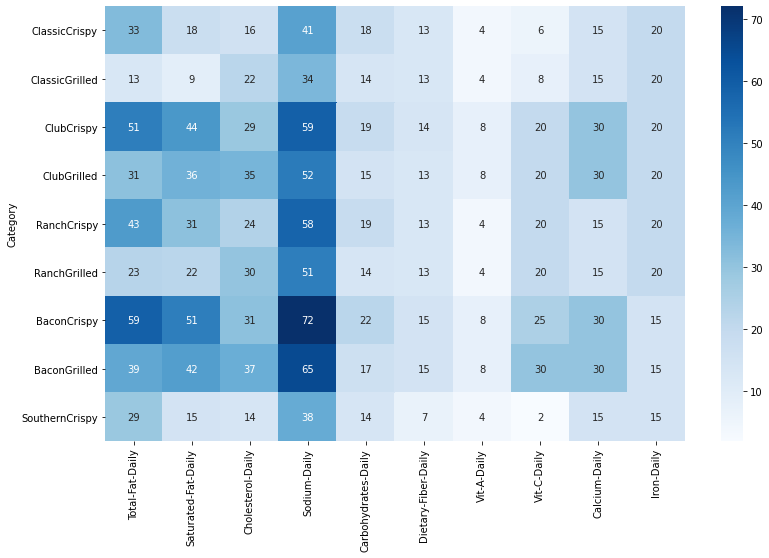

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(sandwich_data.iloc[:,1:11], cmap='Blues', annot=True, 
            yticklabels=sandwich_data['Item Type']+sandwich_data['Chicken Type'])
plt.show()

##**Answer**
From the bar chart, we can see that **Bacon Clubhouse Crispy Chicken Sandwich** has the **highest daily nutritional value**, but from the heat map it can be seen that **Bacon Clubhouse Crispy Chicken Sandwich** has the **highest sodium** for daily nutritional value. So, based on the heat maps we should choose **Bacon Clubhouse Grilled Chicken Sandwich** rather than **Bacon Clubhouse Crispy Chicken Sandwich**

# **d. What about ordering egg whites instead of whole eggs?**

In [ ]:
egg_data = mcd_df[mcd_df['Item'].str.contains("with Egg")]
egg_data = egg_data[egg_data['Item'].str.contains("Sausage McMuffin|Sausage Biscuit")]
egg_data = egg_data.iloc[:,[0,5,7,10,12,14,16,19,20,21,22]]

egg_data['Total Daily Value'] = egg_data.sum(axis=1)
egg_data['Egg Type'] = egg_data['Item'].str.extract("(Egg Whites)")
egg_data['Egg Type'].fillna('Whole Egg', axis=0, inplace=True)
egg_data['Item Type'] = egg_data['Item'].str.extract("(Sausage McMuffin|Regular Biscuit|Large Biscuit)")
egg_data

,Item,Total-Fat-Daily,Saturated-Fat-Daily,Cholesterol-Daily,Sodium-Daily,Carbohydrates-Daily,Dietary-Fiber-Daily,Vit-A-Daily,Vit-C-Daily,Calcium-Daily,Iron-Daily,Total Daily Value,Egg Type,Item Type
Category,,,,,,,,,,,,,,
Breakfast,Sausage McMuffin with Egg,43,52,95,36,10,17,15,0,30,15,313,Whole Egg,Sausage McMuffin
Breakfast,Sausage McMuffin with Egg Whites,35,42,16,37,10,17,6,0,25,10,198,Egg Whites,Sausage McMuffin
Breakfast,Sausage Biscuit with Egg (Regular Biscuit),50,71,83,49,12,6,6,0,10,20,307,Whole Egg,Regular Biscuit
Breakfast,Sausage Biscuit with Egg (Large Biscuit),57,74,83,53,14,11,10,0,10,20,332,Whole Egg,Large Biscuit
Breakfast,Sausage Biscuit with Egg Whites (Regular Biscuit),42,62,11,49,11,6,0,0,8,15,204,Egg Whites,Regular Biscuit
Breakfast,Sausage Biscuit with Egg Whites (Large Biscuit),49,65,11,54,13,11,4,0,8,15,230,Egg Whites,Large Biscuit


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


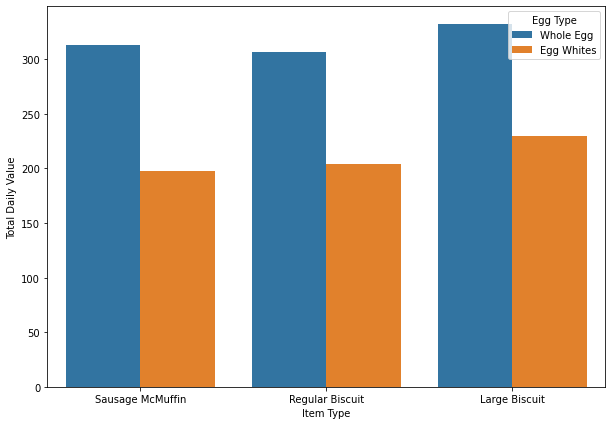

In [ ]:
plt.figure(figsize=(10,7))
clrs = ['whitesmoke' if (x == 'Egg Whites') else 'yellow' for x in egg_data['Egg Type'] ]
sns.barplot(egg_data['Item Type'], egg_data['Total Daily Value'], hue=egg_data['Egg Type'])
plt.show()

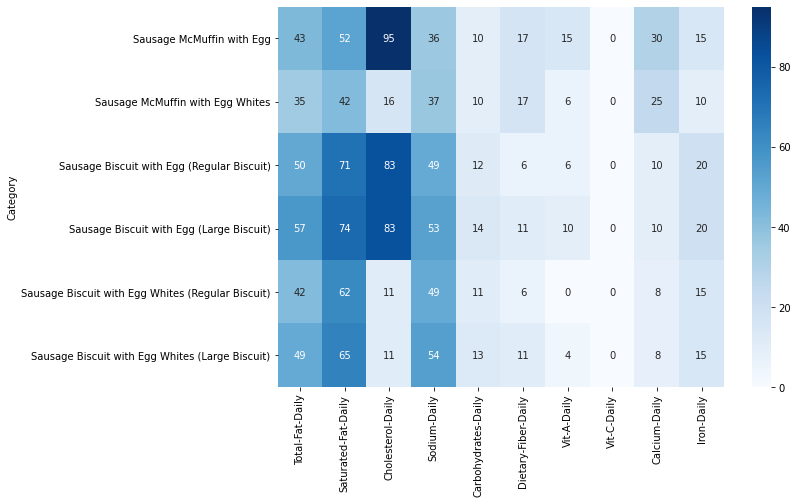

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(egg_data.iloc[:,1:11], cmap='Blues', annot=True, 
            yticklabels=egg_data['Item'])
plt.show()

##**Answer**
Items with **whole eggs have more nutritional** content than white eggs, and from the heat map it can be seen that the **cholesterol** content of items with **whole eggs is higher** than items with white eggs.

# **e. What is the least number of items could you order from the menu to meet one day's nutritional requirements?**

In [ ]:
#reset index
mcd_list = mcd_df.reset_index()
mcd_list.head()

,Category,Item,Serving-Size,Calories,Calories-from-Fat,Total-Fat,Total-Fat-Daily,Saturated-Fat,Saturated-Fat-Daily,Trans-Fat,Cholesterol,Cholesterol-Daily,Sodium,Sodium-Daily,Carbohydrates,Carbohydrates-Daily,Dietary-Fiber,Dietary-Fiber-Daily,Sugars,Protein,Vit-A-Daily,Vit-C-Daily,Calcium-Daily,Iron-Daily
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [ ]:
#creating new dataframe
least_number_order = mcd_list.iloc[:,[1,6,8,11,13,15,17,20,21,22,23]]
least_number_order.head()

,Item,Total-Fat-Daily,Saturated-Fat-Daily,Cholesterol-Daily,Sodium-Daily,Carbohydrates-Daily,Dietary-Fiber-Daily,Vit-A-Daily,Vit-C-Daily,Calcium-Daily,Iron-Daily
0,Egg McMuffin,20,25,87,31,10,17,10,0,25,15
1,Egg White Delight,12,15,8,32,10,17,6,0,25,8
2,Sausage McMuffin,35,42,15,33,10,17,8,0,25,10
3,Sausage McMuffin with Egg,43,52,95,36,10,17,15,0,30,15
4,Sausage McMuffin with Egg Whites,35,42,16,37,10,17,6,0,25,10


In [ ]:
least_number_order.describe()

,Total-Fat-Daily,Saturated-Fat-Daily,Cholesterol-Daily,Sodium-Daily,Carbohydrates-Daily,Dietary-Fiber-Daily,Vit-A-Daily,Vit-C-Daily,Calcium-Daily,Iron-Daily
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,21.815385,29.965385,18.392308,20.676923,15.780769,6.530769,13.426923,8.534615,20.973077,7.734615
std,21.885199,26.639209,29.091653,24.034954,9.419544,6.307057,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,4.750000,2.000000,4.750000,10.000000,0.000000,2.000000,0.000000,6.000000,0.000000
50%,17.000000,24.000000,11.000000,8.000000,15.000000,5.000000,8.000000,0.000000,20.000000,4.000000
75%,35.000000,48.000000,21.250000,36.250000,20.000000,10.000000,15.000000,4.000000,30.000000,15.000000
max,182.000000,102.000000,192.000000,150.000000,47.000000,28.000000,170.000000,240.000000,70.000000,40.000000


In [ ]:
#getting meals with maximum % daily value
max_index=[]
for i in least_number_order.describe().columns:
    mcd_df[mcd_df.index==i]
    max_index.extend(least_number_order[least_number_order[i]==least_number_order.describe().loc['max',i]].index.tolist())
max_index

[82,
 253,
 31,
 32,
 82,
 246,
 249,
 32,
 34,
 88,
 89,
 84,
 88,
 89,
 135,
 246,
 253,
 31,
 32]

In [ ]:
#creating list for meals with max % daily value
index_set = set(max_index)
index_list = list(index_set)
index_list

[32, 89, 34, 135, 82, 84, 246, 88, 249, 253, 31]

In [ ]:
max_data = least_number_order.loc[index_list,:]
max_data

,Item,Total-Fat-Daily,Saturated-Fat-Daily,Cholesterol-Daily,Sodium-Daily,Carbohydrates-Daily,Dietary-Fiber-Daily,Vit-A-Daily,Vit-C-Daily,Calcium-Daily,Iron-Daily
32,Big Breakfast with Hotcakes (Large Biscuit),93,100,192,94,39,28,15,2,30,40
89,Premium Southwest Salad with Grilled Chicken,13,13,23,28,9,28,170,30,15,15
34,Big Breakfast with Hotcakes and Egg Whites (La...,77,81,19,95,38,28,4,2,25,30
135,Minute Maid Orange Juice (Large),0,0,0,0,22,0,0,240,4,0
82,Chicken McNuggets (40 piece),182,101,89,150,39,24,0,15,8,25
84,Premium Bacon Ranch Salad (without Chicken),11,18,9,13,3,12,170,30,15,6
246,Strawberry Shake (Large),36,75,30,11,47,0,30,0,70,0
88,Premium Southwest Salad with Crispy Chicken,33,22,17,35,14,28,170,30,15,15
249,Chocolate Shake (Large),36,74,29,16,47,8,30,0,60,15
253,McFlurry with M&M’s Candies (Medium),50,102,25,11,46,7,25,0,70,10


In [ ]:
#combination food for minimum ordered
from itertools import combinations

for i in combinations(max_data.index,6):
    table = least_number_order.iloc[list(i),:]
    l = []
    for n in max_data.columns[1:]:
        m = table[n].sum()
        l.append(m)
    if all(l>=100*np.ones(10)):
        print(i)
        break

(32, 89, 34, 135, 82, 246)


In [ ]:
min_menu = least_number_order.iloc[list(i),:]
min_menu

,Item,Total-Fat-Daily,Saturated-Fat-Daily,Cholesterol-Daily,Sodium-Daily,Carbohydrates-Daily,Dietary-Fiber-Daily,Vit-A-Daily,Vit-C-Daily,Calcium-Daily,Iron-Daily
32,Big Breakfast with Hotcakes (Large Biscuit),93,100,192,94,39,28,15,2,30,40
89,Premium Southwest Salad with Grilled Chicken,13,13,23,28,9,28,170,30,15,15
34,Big Breakfast with Hotcakes and Egg Whites (La...,77,81,19,95,38,28,4,2,25,30
135,Minute Maid Orange Juice (Large),0,0,0,0,22,0,0,240,4,0
82,Chicken McNuggets (40 piece),182,101,89,150,39,24,0,15,8,25
246,Strawberry Shake (Large),36,75,30,11,47,0,30,0,70,0


In [ ]:
for s in least_number_order.describe().columns:
    print(s,': ', min_menu[s].sum())

Total-Fat-Daily :  401
Saturated-Fat-Daily :  370
Cholesterol-Daily :  353
Sodium-Daily :  378
Carbohydrates-Daily :  194
Dietary-Fiber-Daily :  108
Vit-A-Daily :  219
Vit-C-Daily :  289
Calcium-Daily :  152
Iron-Daily :  110


In [ ]:
min_menu.set_index('Item', inplace=True)
min_menu.head()

,Total-Fat-Daily,Saturated-Fat-Daily,Cholesterol-Daily,Sodium-Daily,Carbohydrates-Daily,Dietary-Fiber-Daily,Vit-A-Daily,Vit-C-Daily,Calcium-Daily,Iron-Daily
Item,,,,,,,,,,
Big Breakfast with Hotcakes (Large Biscuit),93,100,192,94,39,28,15,2,30,40
Premium Southwest Salad with Grilled Chicken,13,13,23,28,9,28,170,30,15,15
Big Breakfast with Hotcakes and Egg Whites (Large Biscuit),77,81,19,95,38,28,4,2,25,30
Minute Maid Orange Juice (Large),0,0,0,0,22,0,0,240,4,0
Chicken McNuggets (40 piece),182,101,89,150,39,24,0,15,8,25


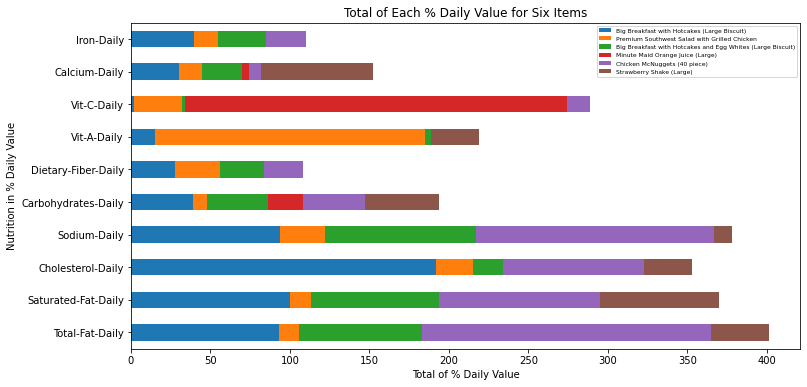

In [ ]:
#plot
min_menu_t = min_menu.transpose()
min_menu_t.plot(kind='barh', figsize=(12,6), stacked=True)
plt.title('Total of Each % Daily Value for Six Items')
plt.ylabel('Nutrition in % Daily Value')
plt.xlabel('Total of % Daily Value')
plt.legend(fontsize=6)
plt.show()

## **Answer**
We have to order at least **6 items** to meet **one day's nutritional requirements**